In [51]:
import numpy as np
import time
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})

In [73]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],   # for multiplying with intercept
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]).T # tutor's expirience 
X

array([[ 1,  1],
       [ 1,  1],
       [ 1,  2],
       [ 1,  1],
       [ 1,  3],
       [ 1,  0],
       [ 1,  5],
       [ 1, 10],
       [ 1,  1],
       [ 1,  2]])

In [74]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [75]:
# average mark for final exam
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [76]:
# setting up the experiment 
def params(theta,iterations,w,n,X, diff = None):
    iterat = []
    errs = []
    flag_break = 0
    for i in range(1, int(iterations + 1)):       
        y_pred = np.dot(w, X.T)
        err = calc_mse(y, y_pred)        
        
        for j in range(w.shape[0]):
            w[j] -= theta * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))            
            iterat.append(i)
            errs.append(err)
            if diff != None and (err - 45.937499999999986) <= diff:                    
                flag_break = 1
                break
        if flag_break == 1:
            break
            
    print(f'MSE  when theta = {theta}, iterations = {i} w = {w}, err = {err}') # МНК: array([47.23214286,  3.91071429]) 45.937499999999986
    print(f'МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = {min(errs)-45.937499999999986}')
    return iterat, errs

In [77]:
n = X.shape[0]
theta = 1e-3
iterations = 1e4
w = np.array([1, 0.5])

MSE  when theta = 0.0001, iterations = 10000 w = [31.64269117  6.78942579], err = 176.62240977239327
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 130.68490977239327
time 0.414157 s


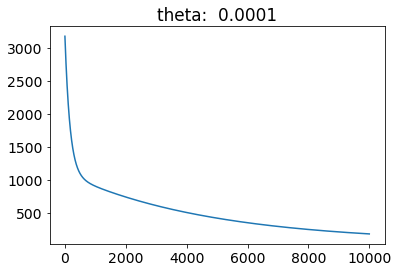

MSE  when theta = 0.00025, iterations = 10000 w = [46.07401354  4.12457172], err = 46.6589618408401
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.7214618408401137
time 0.423658 s


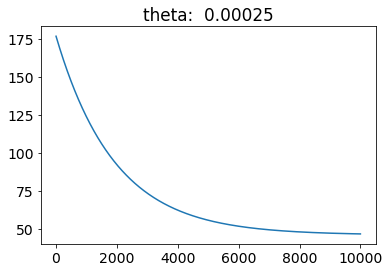

MSE  when theta = 0.0005, iterations = 10000 w = [47.22575558  3.91189375], err = 45.937521956184426
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 2.195618444034153e-05
time 0.438499 s


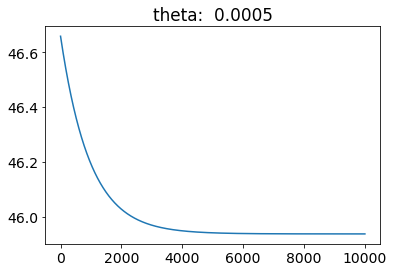

MSE  when theta = 0.00075, iterations = 10000 w = [47.23214024  3.91071477], err = 45.93750000000369
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 3.68771679859492e-12
time 0.487443 s


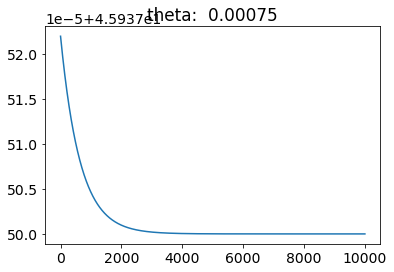

MSE  when theta = 0.0085, iterations = 10000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = -7.105427357601002e-15
time 0.491988 s


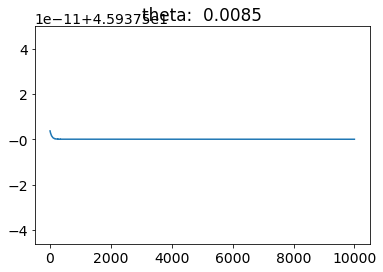

MSE  when theta = 0.001, iterations = 10000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
time 0.396249 s


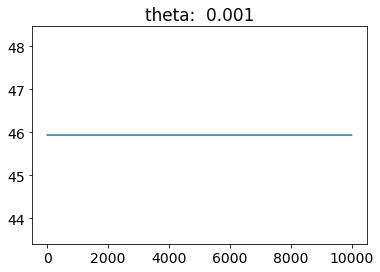

MSE  when theta = 0.01, iterations = 10000 w = [47.23214286  3.91071429], err = 45.9375
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
time 0.378624 s


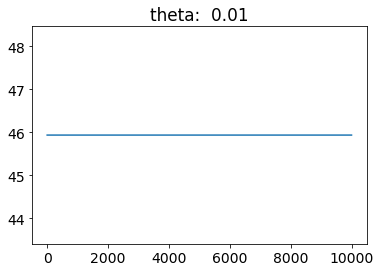

In [78]:
for theta in [0.0001, 0.00025, 0.0005, 0.00075, 0.0085, 0.001, 0.01]:
    start = time.time()
    iterat, errs = params(theta, 1e4, w, n, X)
    print ('time {:g} s'.format(time.time() - start))
    plt.title(f"theta:  {theta}")
    plt.plot(iterat, errs)    
    plt.show()

MSE  when theta = 0.0001, iterations = 1000 w = [ 7.38462266 10.6861326 ], err = 900.2860625234676
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 854.3485625234676
0.120713 s


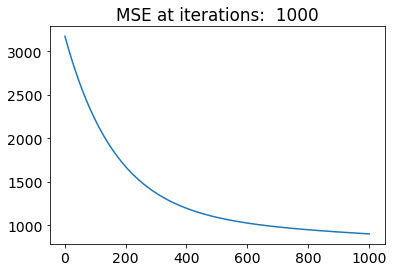

MSE  when theta = 0.0001, iterations = 1500 w = [13.22729206 10.18369334], err = 667.6896310228233
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 621.7521310228233
0.0764313 s


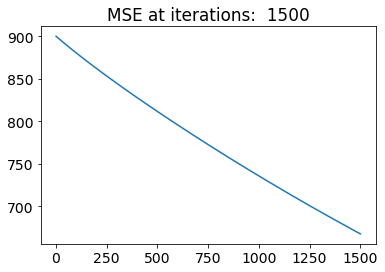

MSE  when theta = 0.0001, iterations = 15000 w = [40.08495623  5.23049697], err = 73.40594066512871
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 27.468440665128725
0.711156 s


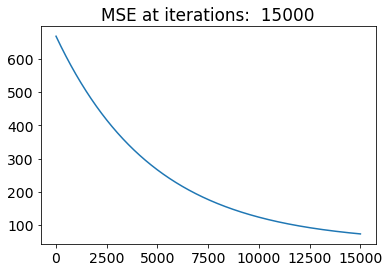

MSE  when theta = 0.0001, iterations = 20000 w = [46.33894733  4.07564967], err = 46.36649955564669
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.4289995556467048
0.732958 s


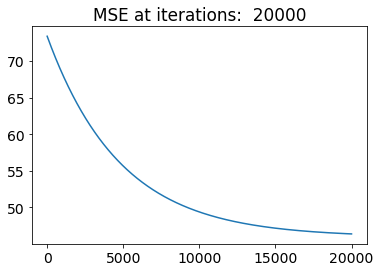

MSE  when theta = 0.0001, iterations = 30000 w = [47.19268226  3.91800099], err = 45.938337319290696
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0008373192907100702
1.19759 s


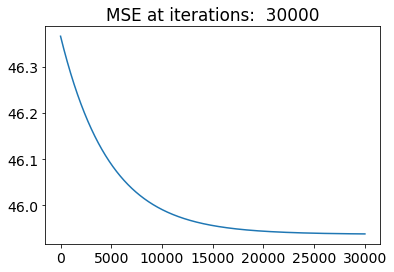

MSE  when theta = 0.0001, iterations = 40000 w = [47.23152657  3.91082809], err = 45.93750020423811
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 2.0423812685521625e-07
1.68005 s


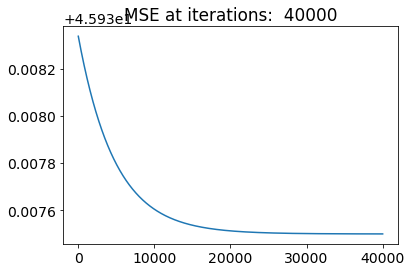

In [84]:
# lets change just iterations
n = X.shape[0]
theta = 1e-3
iterations = 1e4
w = np.array([1, 0.5])
j=0


for iterations in [1000, 1500, 15000, 20000, 30000, 40000]:
    start = time.time()
    iterat, errs = params(0.0001, iterations, w, n, X) 
    print ("{:g} s".format(time.time() - start))
    plt.plot(iterat, errs)    
    plt.title(f"MSE at iterations:  {iterations}")

    plt.show()

MSE  when theta = 0.0008333333333333334, iterations = 5000 w = [46.65396102  4.01747998], err = 46.117534308414676
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.18003430841469026
Time 0.245228 s


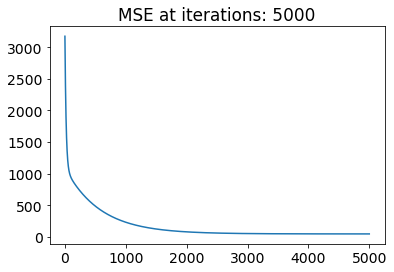

MSE  when theta = 0.00045454545454545455, iterations = 10000 w = [47.22702622  3.91165911], err = 45.93751408812911
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 1.408812912728763e-05
Time 0.385864 s


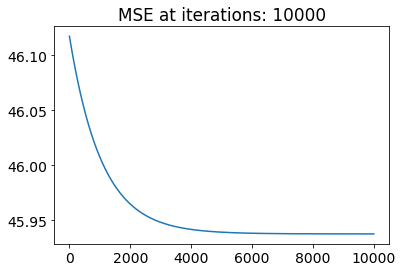

MSE  when theta = 0.0003125, iterations = 15000 w = [47.23210378  3.9107215 ], err = 45.9375000008214
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 8.214158242481062e-10
Time 0.649468 s


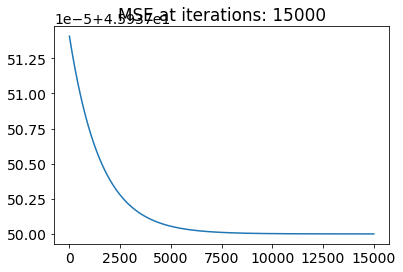

MSE  when theta = 0.0002380952380952381, iterations = 20000 w = [47.23214258  3.91071434], err = 45.93750000000005
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 2.842170943040401e-14
Time 0.873763 s


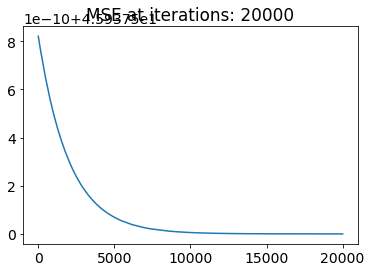

MSE  when theta = 0.00016129032258064516, iterations = 30000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = -1.4210854715202004e-14
Time 1.14191 s


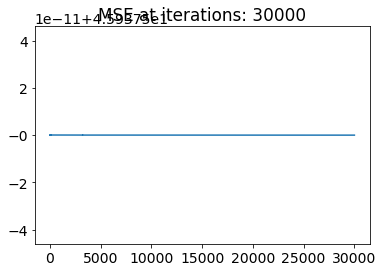

MSE  when theta = 0.00012195121951219512, iterations = 40000 w = [47.23214286  3.91071429], err = 45.9375
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = -1.4210854715202004e-14
Time 1.65008 s


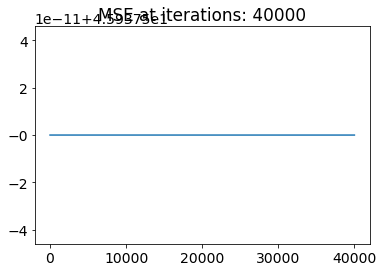

In [85]:
n = X.shape[0]
theta = 1e-2
iterations = 1e4
w = np.array([1, 0.5])
t0, t1 = 5, 1000

for iterations in [5000, 10000, 15000, 20000, 30000, 40000]:
    
        start =time.time()
        iterat, errs = params(t0 / (iterations + t1), iterations, w, n, X) 
        print ("Time {:g} s".format(time.time() - start))    
        plt.plot(iterat, errs)    
        plt.title(f"MSE at iterations: {iterations}")

        plt.show()

choose minimum carefully when considering Theta and Itirations simultaneously

MSE  when theta = 0.0008333333333333334, iterations = 5000 w = [46.65396102  4.01747998], err = 46.117534308414676
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.18003430841469026
Time 0.275192 s


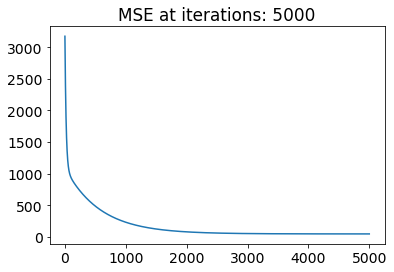

MSE  when theta = 0.0008333333333333334, iterations = 5000 w = [47.22456225  3.9121141 ], err = 45.93753094809349
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 3.094809350301375e-05
Time 0.193148 s


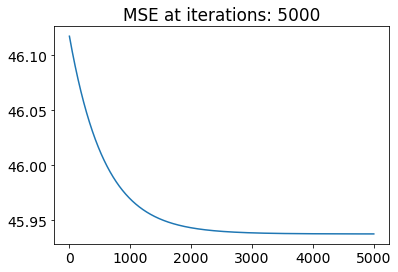

MSE  when theta = 0.0008333333333333334, iterations = 5000 w = [47.23204347  3.91073264], err = 45.93750000532002
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 5.320032414601883e-09
Time 0.20872 s


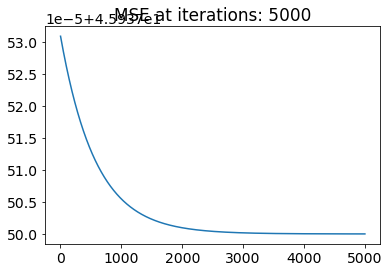

MSE  when theta = 0.0008333333333333334, iterations = 5000 w = [47.23214155  3.91071453], err = 45.937500000000924
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 9.237055564881302e-13
Time 0.192777 s


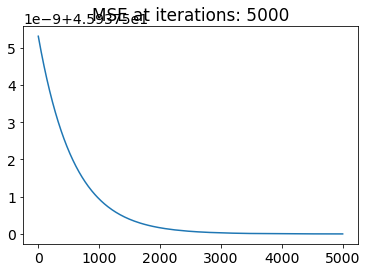

MSE  when theta = 0.0008333333333333334, iterations = 5000 w = [47.23214284  3.91071429], err = 45.9375
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = -7.105427357601002e-15
Time 0.195111 s


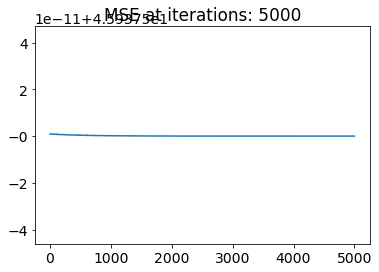

MSE  when theta = 0.0008333333333333334, iterations = 5000 w = [47.23214286  3.91071429], err = 45.93749999999999
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = -1.4210854715202004e-14
Time 0.195309 s


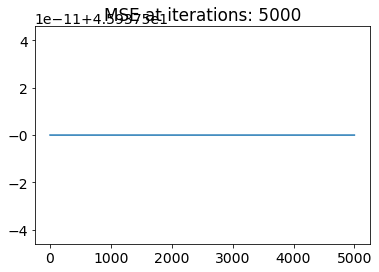

MSE  when theta = 0.0008333333333333334, iterations = 5000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = -1.4210854715202004e-14
Time 0.19382 s


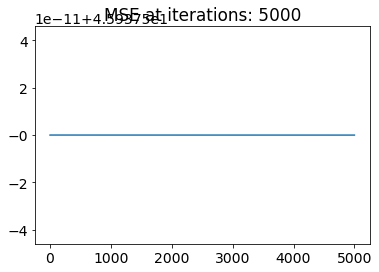

MSE  when theta = 0.00045454545454545455, iterations = 10000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 0.370819 s


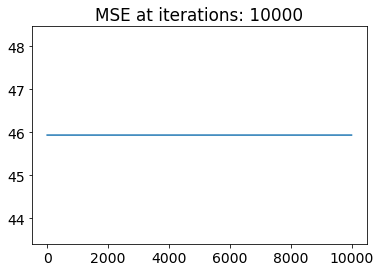

MSE  when theta = 0.00045454545454545455, iterations = 10000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 0.431836 s


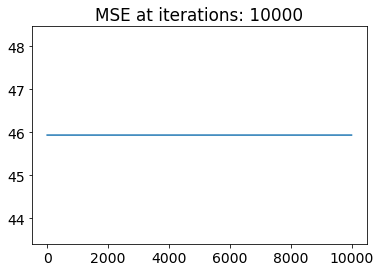

MSE  when theta = 0.00045454545454545455, iterations = 10000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 0.481092 s


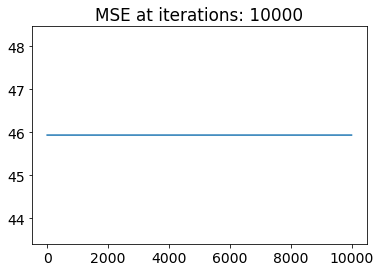

MSE  when theta = 0.00045454545454545455, iterations = 10000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 0.479003 s


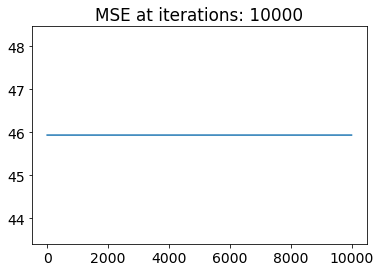

MSE  when theta = 0.00045454545454545455, iterations = 10000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 0.452529 s


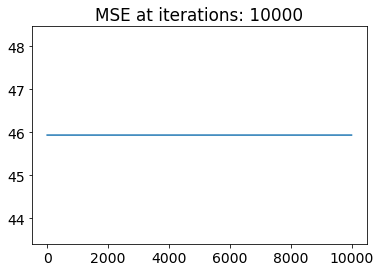

MSE  when theta = 0.00045454545454545455, iterations = 10000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 0.386903 s


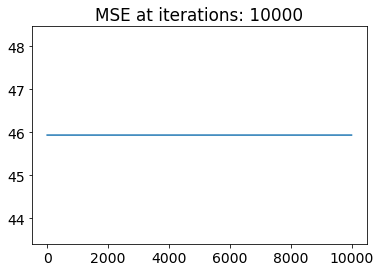

MSE  when theta = 0.00045454545454545455, iterations = 10000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 0.377386 s


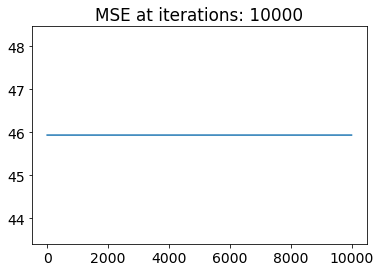

MSE  when theta = 0.0003125, iterations = 15000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 0.557763 s


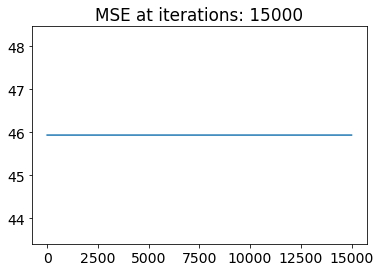

MSE  when theta = 0.0003125, iterations = 15000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 0.550922 s


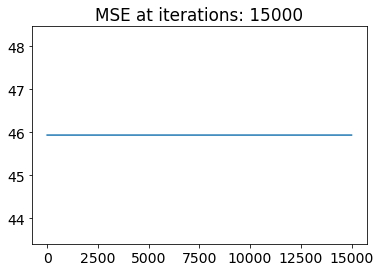

MSE  when theta = 0.0003125, iterations = 15000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 0.556221 s


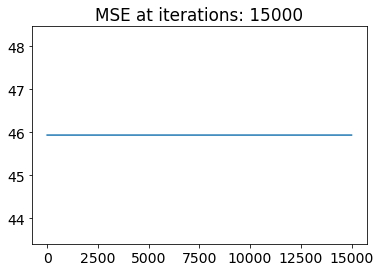

MSE  when theta = 0.0003125, iterations = 15000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 0.554657 s


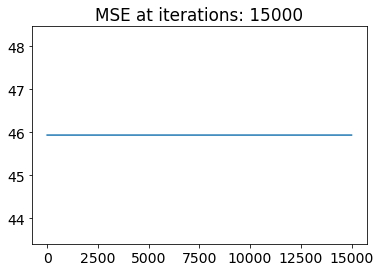

MSE  when theta = 0.0003125, iterations = 15000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 0.562243 s


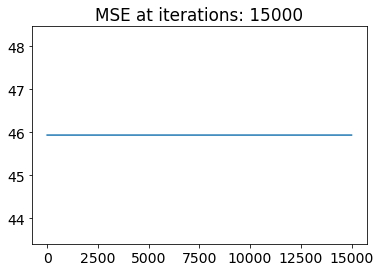

MSE  when theta = 0.0003125, iterations = 15000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 0.553413 s


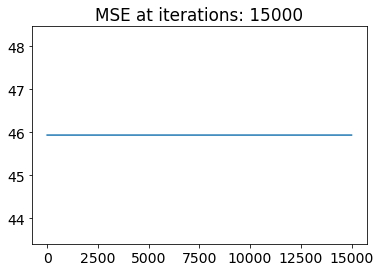

MSE  when theta = 0.0003125, iterations = 15000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 0.564158 s


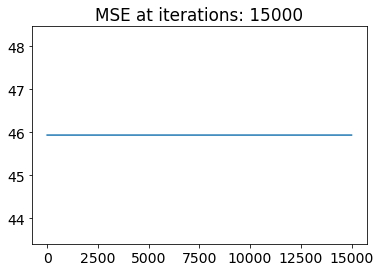

MSE  when theta = 0.0002380952380952381, iterations = 20000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 0.738101 s


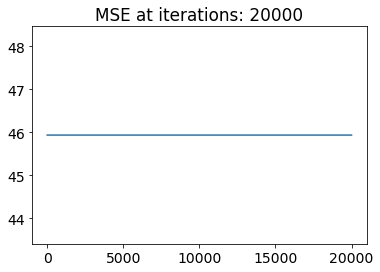

MSE  when theta = 0.0002380952380952381, iterations = 20000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 0.737191 s


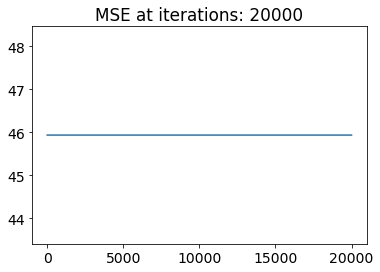

MSE  when theta = 0.0002380952380952381, iterations = 20000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 0.723804 s


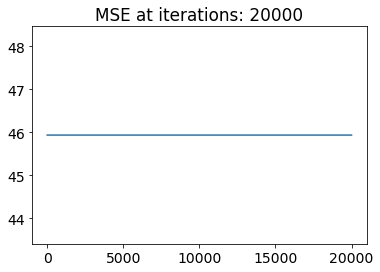

MSE  when theta = 0.0002380952380952381, iterations = 20000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 0.730059 s


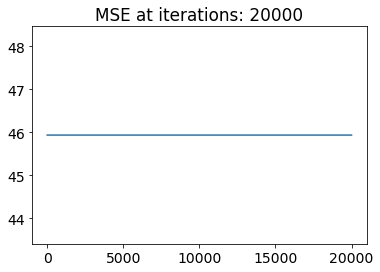

MSE  when theta = 0.0002380952380952381, iterations = 20000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 0.723968 s


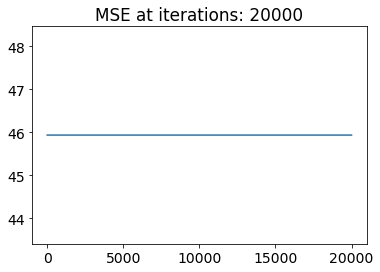

MSE  when theta = 0.0002380952380952381, iterations = 20000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 0.732527 s


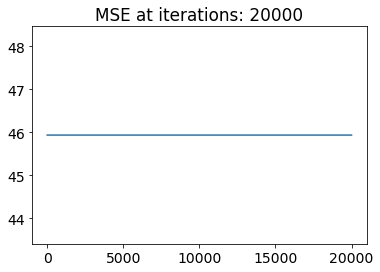

MSE  when theta = 0.0002380952380952381, iterations = 20000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 0.730301 s


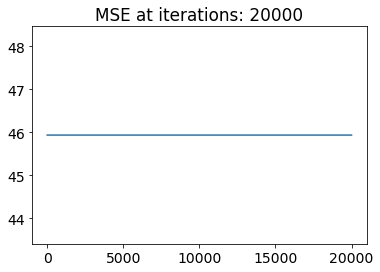

MSE  when theta = 0.00016129032258064516, iterations = 30000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 1.09609 s


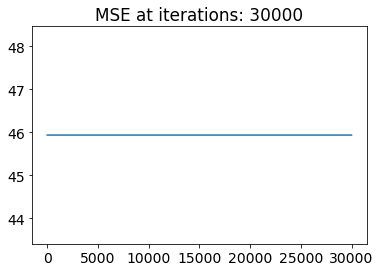

MSE  when theta = 0.00016129032258064516, iterations = 30000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 1.09037 s


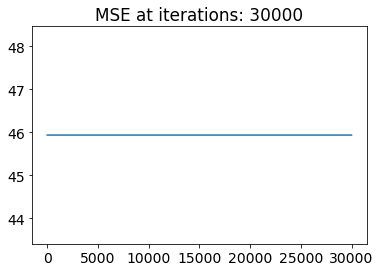

MSE  when theta = 0.00016129032258064516, iterations = 30000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 1.08854 s


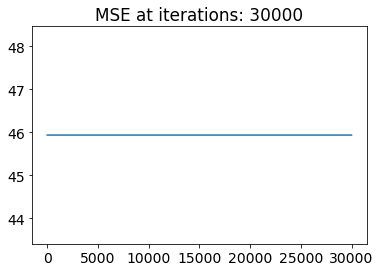

MSE  when theta = 0.00016129032258064516, iterations = 30000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 1.12065 s


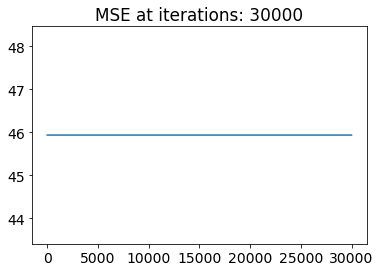

MSE  when theta = 0.00016129032258064516, iterations = 30000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 1.09366 s


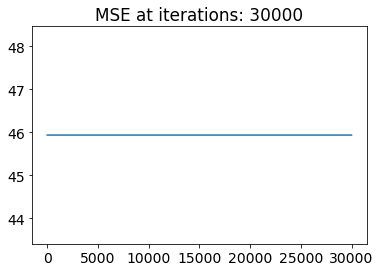

MSE  when theta = 0.00016129032258064516, iterations = 30000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 1.47089 s


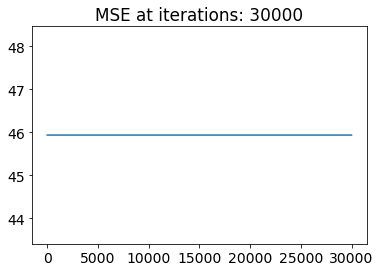

MSE  when theta = 0.00016129032258064516, iterations = 30000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 1.12159 s


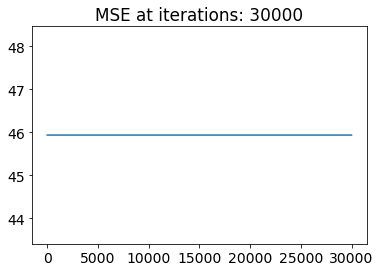

MSE  when theta = 0.00012195121951219512, iterations = 40000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 1.80245 s


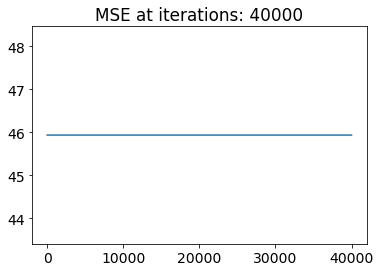

MSE  when theta = 0.00012195121951219512, iterations = 40000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 1.5074 s


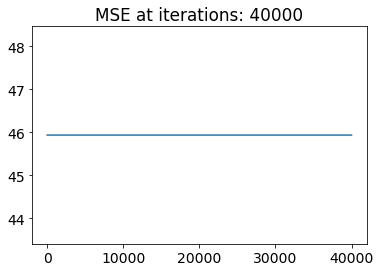

MSE  when theta = 0.00012195121951219512, iterations = 40000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 1.47697 s


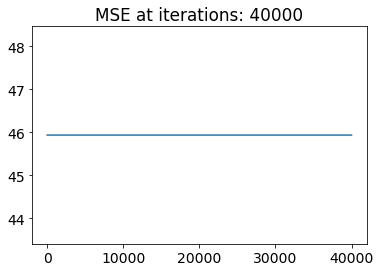

MSE  when theta = 0.00012195121951219512, iterations = 40000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 1.46234 s


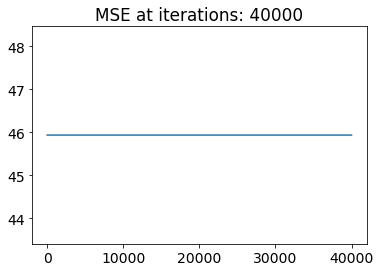

MSE  when theta = 0.00012195121951219512, iterations = 40000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 1.46102 s


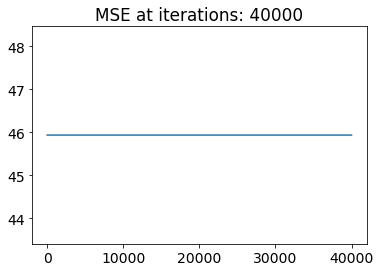

MSE  when theta = 0.00012195121951219512, iterations = 40000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 1.67256 s


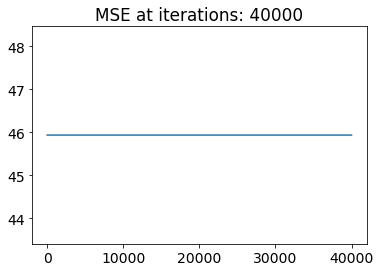

MSE  when theta = 0.00012195121951219512, iterations = 40000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 0.0
Time 1.65534 s


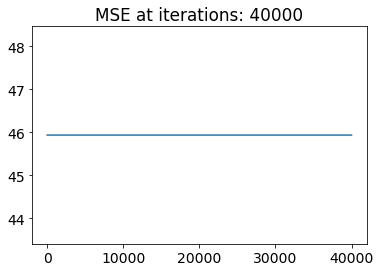

In [82]:
#lets change Theta and iterations
n = X.shape[0]
theta = 1e-2
iterations = 1e4
w = np.array([1, 0.5])
t0, t1 = 5, 1000

for iterations in [5000, 10000, 15000, 20000, 30000, 40000]:
    for theta in [0.0001, 0.00025, 0.0005, 0.00075, 0.0085, 0.001, 0.01]:
        start =time.time()
        iterat, errs = params(t0 / (iterations + t1), iterations, w, n, X) 
        print ("Time {:g} s".format(time.time() - start))    
        plt.plot(iterat, errs)    
        plt.title(f"MSE at iterations: {iterations}")

        plt.show()

checking myself again:)

*3. Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога. 

Сколько нужно сделать итераций, если установить допустимое отклонение mse за одну итерацию в размере diff=1e-6, а значение eta=1e-2?

In [95]:
w = np.array([1, 0.5])
diff = 1e-6
theta = 1e-2
iterat, errs = params(1e-2, 40000, w, n, X, 1e-6) 


MSE  when theta = 0.01, iterations = 995 w = [47.23080079  3.91096471], err = 45.937500988776584
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => variance = 9.88776598376262e-07
